In [1]:
import seaborn
import pandas
import numpy
from matplotlib import pyplot as plot

In [89]:
def read_data(filename):
    raw_data = pandas.read_excel(filename, nrows=400, usecols="E:X")
    tidy_data = pandas.melt(raw_data, var_name="year", value_name="co2")
    tidy_data['year'] =  pandas.to_datetime(tidy_data['year'])
    return tidy_data

def plot_with_percentiles(data, percentiles):
    data_with_percentiles = data.groupby(["year"]).describe(percentiles=percentiles)
    axis = seaborn.lineplot(data=data_with_percentiles["co2"]["50%"])
    axis.fill_between(data_with_percentiles.index,
                      data_with_percentiles[('co2', '5%')],
                      data_with_percentiles[('co2', '95%')],
                      alpha=0.3)

def set_style(tick_color="#444",
              grid_color="#ddd",
              tick_width="0.6",
              figure_size=(4, 4)):
    seaborn.set_theme(style="whitegrid", rc={
        "axes.grid.axis": "y",
        "axes.grid.which": "major",
        "grid.color": grid_color,
        "xtick.top": True,
        "ytick.right": True,
        "xtick.bottom": True,
        "ytick.left": True,
        "xtick.minor.visible": True,
        "ytick.minor.visible": True,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "ytick.color": tick_color,
        "xtick.color": tick_color,
        "xtick.major.width": tick_width,
        "ytick.major.width": tick_width,
        "xtick.minor.width": tick_width,
        "ytick.minor.width": tick_width,
        "grid.linewidth": tick_width,
        "text.color": "black"
    })
    seaborn.set_context("paper")
    plot.figure(figsize=figure_size)
    

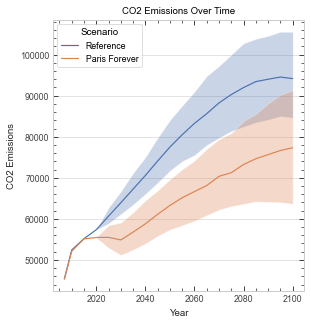

In [94]:
reference_data = read_data("example_Ref Emissions.xlsx")
paris_forever_data = read_data("example_PF Emissions.xlsx")

set_style(figure_size=(4.5,5))
plot_with_percentiles(reference_data, [.05, .5, .95])
plot_with_percentiles(paris_forever_data, [.05, .5, .95])
plot.title("CO2 Emissions Over Time")
plot.xlabel("Year")
plot.ylabel("CO2 Emissions")
plot.legend(title="Scenario", loc='upper left', labels=['Reference', 'Paris Forever'])
plot.savefig("test.png", dpi=300, bbox_inches="tight")

In [36]:
seaborn.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.8',
 'ytick.color': '.8',
 'xtick.direction': 'in',
 'ytick.direction': 'in',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}